<font size=+3 color="black"><center><b>Question 1 - Identify the Top Complaint Type</b></center></font>

The goal of this notebook is to find the answer to the first question of the problem statement:

<font color="royalblue"><center><em>Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?</em></center></font>

For this purpose, we need to read back the 311 Dataset and explore it. By the end of this exercise, we need to figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on first.

<br>

# Introduction

We start by importing the necessary libraries and loading the 311 Dataset onto a DataFrame.

## Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

C:\Users\ko40\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data

In [2]:
columns = ['Created Date', 'Unique Key', 'Complaint Type', 'Incident Zip', 'Incident Address', 'Street Name',
           'Address Type', 'City', 'Resolution Description', 'Borough', 'Latitude', 'Longitude', 'Closed Date', 
           'Location Type', 'Status']

df = pd.read_csv('311_Service_Requests_from_2010_to_Present_min.csv', 
                 nrows = 1E+7, 
                 usecols = columns, 
                 parse_dates = ['Created Date', 'Closed Date'])

df['Year'] = df['Created Date'].dt.year
df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude,Year
0,45531130,2020-02-02 06:09:17,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993,2020
1,45529784,2020-02-02 14:15:24,NaT,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673,2020
2,45527528,2020-02-02 02:27:41,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432,2020
3,45530329,2020-02-02 12:13:18,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558,2020
4,45528814,2020-02-02 13:59:44,NaT,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533,2020


# Data Analysis

First, let’s look at a summary of our dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Created Date            datetime64[ns]
 2   Closed Date             datetime64[ns]
 3   Complaint Type          object        
 4   Location Type           object        
 5   Incident Zip            float64       
 6   Incident Address        object        
 7   Street Name             object        
 8   Address Type            object        
 9   City                    object        
 10  Status                  object        
 11  Resolution Description  object        
 12  Borough                 object        
 13  Latitude                float64       
 14  Longitude               float64       
 15  Year                    int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(9)
memory usage: 734.8+ MB


There are 16 columns in total. The column of interest for this exercise is the 'Complaint Type'.

How many different complaint types exist in our dataset, including duplicates entries of the same type?

In [4]:
print ('There are {} different complaint types.'.format(df['Complaint Type'].nunique()))

There are 30 different complaint types.


Let’s see how many complaints fall in each category:

In [5]:
df['Complaint Type'].value_counts()   # Returns a Series containing counts of unique values.

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric      

The first two types appear to be similar. That's because in 2014 the label changed from 'HEATING' to 'HEAT/HOT WATER'. Therefore, we need to merge these complaint types and analyse them together. We will perform the same thing for the 'PAINT - PLASTER'-'PAINT/PLASTER' types. 

In [6]:
df.loc[df['Complaint Type'] == 'HEATING', 'Complaint Type'] = 'HEAT/HOT WATER'
df.loc[df['Complaint Type'] == 'PAINT - PLASTER', 'Complaint Type'] = 'PAINT/PLASTER'

# or
# df['Complaint Type'] = np.where(df['Complaint Type'] == 'HEATING','HEAT/HOT WATER', df['Complaint Type'])

print ('Top 5 complaints:')
df['Complaint Type'].value_counts().head()

Top 5 complaints:


HEAT/HOT WATER          2149424
PLUMBING                 711130
PAINT/PLASTER            707695
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     451643
Name: Complaint Type, dtype: int64

To visualise the results, we will first merge the less common complaints into a new one titled ‘Rest’.

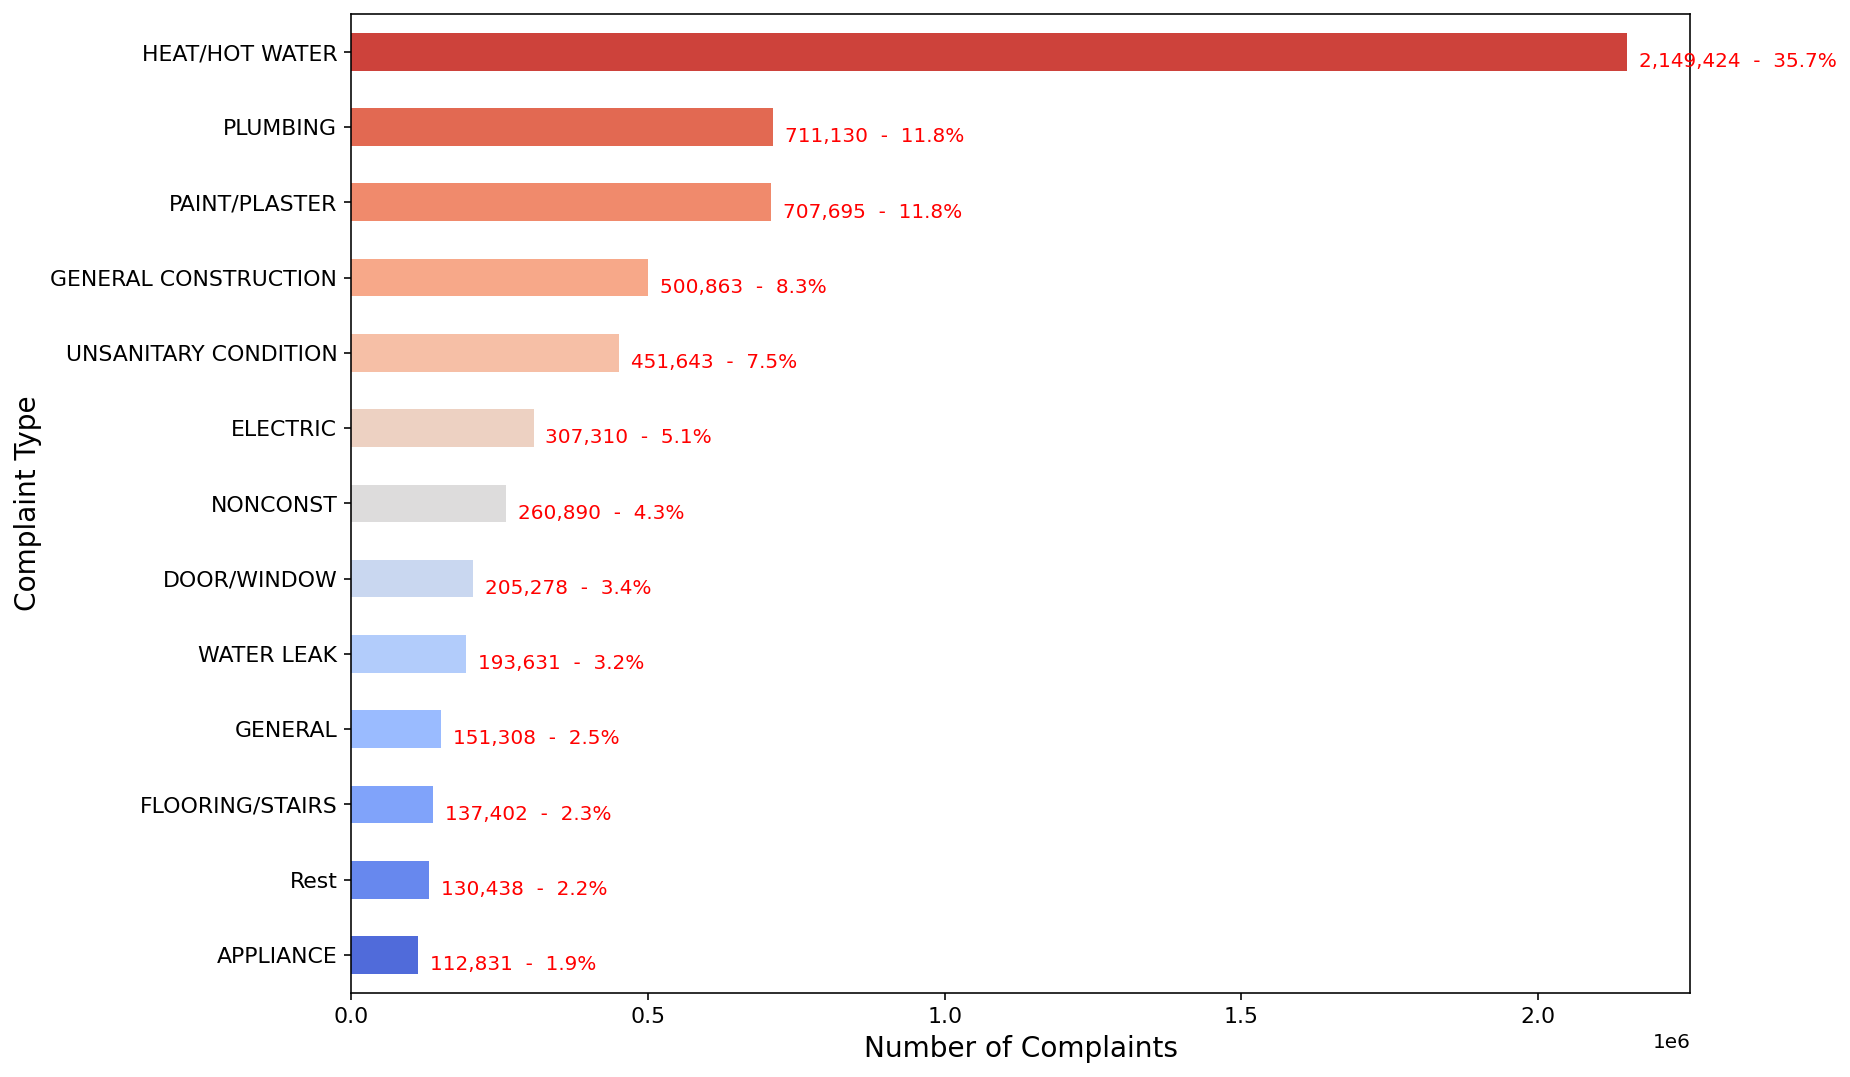

In [7]:
df_new = df.copy()

# find the name of the less common complaints and rename all corresponding rows
idx = df['Complaint Type'].value_counts().sort_values().head(16).index
df_new.loc[df_new['Complaint Type'].isin(idx), 'Complaint Type'] = 'Rest'

df_complaints = df_new['Complaint Type'].value_counts().sort_values()

df_complaints.plot(kind = 'barh', figsize = (12, 9), fontsize = 11, color = sns.color_palette('coolwarm', len(df_complaints)))
plt.ylabel('Complaint Type', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)

# Includes the number of incidents and the corresponding percentage for every type
for index, value in enumerate(df_complaints):    
    label = str(format(int(value), ',')) + '  -  {}%'.format(round( (value/df_complaints.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 20000, index - 0.2 ), color = 'red')

Evidently, <font color="firebrick">'HEAT/HOT WATER'</font> is the <font color="firebrick">most frequent complaint</font> during the studied period. It amounts to approximately 36% of all complaints.

Is it also the most common complaint for each year individually?

In [8]:
df.groupby(['Year'])['Complaint Type'].agg(pd.Series.mode)

Year
2010    HEAT/HOT WATER
2011    HEAT/HOT WATER
2012    HEAT/HOT WATER
2013    HEAT/HOT WATER
2014    HEAT/HOT WATER
2015    HEAT/HOT WATER
2016    HEAT/HOT WATER
2017    HEAT/HOT WATER
2018    HEAT/HOT WATER
2019    HEAT/HOT WATER
2020    HEAT/HOT WATER
Name: Complaint Type, dtype: object

It has been indeed the most common complaint for each year individually. 

<br>

# Conclusions

Based on the previous analysis, the Department of Housing Preservation and Development of New York City should address the <font color="firebrick"><b>'HEAT/HOT WATER'</b></font> complaint first. This type of complaint has the highest number of reports (more than 2 million, amounting to 36% of all complaints) and has always been the most frequent complaint in every individual year since 2010.

<br>

---

# Quiz

## Question 1

What is the total number of complaints that exist in the dataset?

In [9]:
df['Complaint Type'].notnull().sum()

6019843

## Question 2

How many different types of complaints can you find in the dataset, including duplicates entries of the same type?

In [10]:
df['Complaint Type'].nunique() + 2 # we add 2 because we merged two pairs of duplicates entries of the same type

30

## Question 3

How many Elevator complaints can you find in the dataset?

In [11]:
df['Complaint Type'].value_counts()['ELEVATOR']

6725

## Question 4

How many Electric complaints can you find in the dataset?

In [12]:
df['Complaint Type'].isin(['ELECTRIC', 'Electric']).sum()

# df['Complaint Type'].value_counts()['ELECTRIC'] + df['Complaint Type'].value_counts()['Electric']

307311